In [68]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
ORIGINAL_CSV_PATH = 'US_AQI.csv' 

In [41]:
# If CSV file is in the same directory as the notebook
df = pd.read_csv(ORIGINAL_CSV_PATH)
print(df.shape)
df.head(3)

(5617325, 15)


,Unnamed: 0,CBSA Code,Date,AQI,Category,Defining Parameter,Number of Sites Reporting,city_ascii,state_id,state_name,lat,lng,population,density,timezone
0,0,10140,2022-01-01,21,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
1,1,10140,2022-01-02,12,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
2,2,10140,2022-01-03,18,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles


In [42]:
df.columns

Index(['Unnamed: 0', 'CBSA Code', 'Date', 'AQI', 'Category',
       'Defining Parameter', 'Number of Sites Reporting', 'city_ascii',
       'state_id', 'state_name', 'lat', 'lng', 'population', 'density',
       'timezone'],
      dtype='object')

In [43]:
columns = ['CBSA Code', 'Date', 'AQI', 'Category', 'Defining Parameter', 'Number of Sites Reporting',
           'state_id', 'state_name','population',]

In [44]:
df = df[columns]
print(df.shape)
df.head(3)

(5617325, 9)


,CBSA Code,Date,AQI,Category,Defining Parameter,Number of Sites Reporting,state_id,state_name,population
0,10140,2022-01-01,21,Good,PM2.5,2,WA,Washington,16571.0
1,10140,2022-01-02,12,Good,PM2.5,2,WA,Washington,16571.0
2,10140,2022-01-03,18,Good,PM2.5,2,WA,Washington,16571.0


In [45]:
df['Defining Parameter'].value_counts()

Defining Parameter
Ozone    3029724
PM2.5    1425807
PM10      463374
NO2       359166
CO        339254
Name: count, dtype: int64

In [46]:
df['AQI'].describe()

count    5.617325e+06
mean     4.665572e+01
std      3.570811e+01
min      0.000000e+00
25%      3.000000e+01
50%      4.100000e+01
75%      5.400000e+01
max      2.064600e+04
Name: AQI, dtype: float64

In [52]:
# Get the minimum date from the 'Date' column
min_date = min(df['Date'])
print(min_date)

# Get the maximum date from the 'Date' column
max_date = max(df['Date'])
print(max_date)

1980-01-01
2022-05-31


In [54]:
# Get the maximum AQI value for each category
cat_aqi = df.groupby('Category')[['AQI']].max()
cat_aqi

,AQI
Category,
Good,50
Hazardous,20646
Moderate,100
Unhealthy,200
Unhealthy for Sensitive Groups,150
Very Unhealthy,300


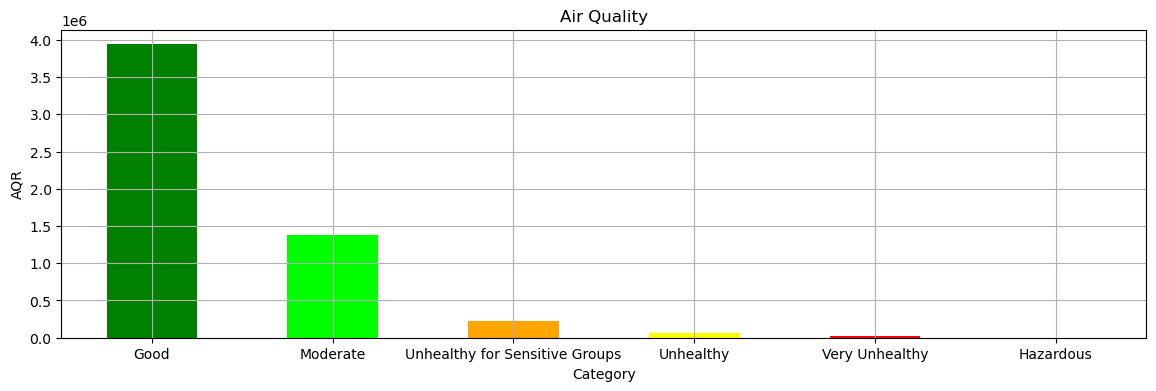

In [174]:
cat_size.plot.bar(
    rot=45,
    grid=True,
    figsize=[14,4],
    title='Air Quality',
    ylabel='AQR',
    color=['g','lime','orange','yellow','r','purple'])
# Rotate x-axis labels
plt.xticks(rotation=0)
# Save the plot to a file
plt.savefig('Good_Air_Quality.png', format='png')
plt.show() 

In [104]:
df['Year']=df.Date.replace('-.*','',regex=True)

In [176]:
def AVG_STATE_AQI(state_id,state):
    Arizona_Yearly_AQI = df[df.state_id==f'{state_id}'].sort_values('Year').groupby('Year').AQI.mean()
    
    Arizona_Yearly_AQI.plot.bar(
        figsize=[12,2],
        title=f'{state} Average Air Quality (1980-2022)' 
    );

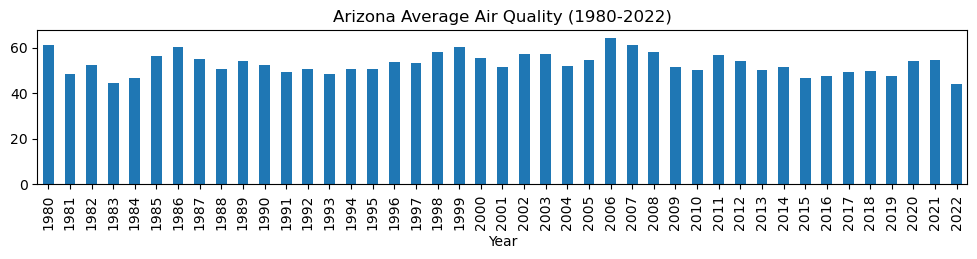

In [177]:
AVG_STATE_AQI('AZ','Arizona')

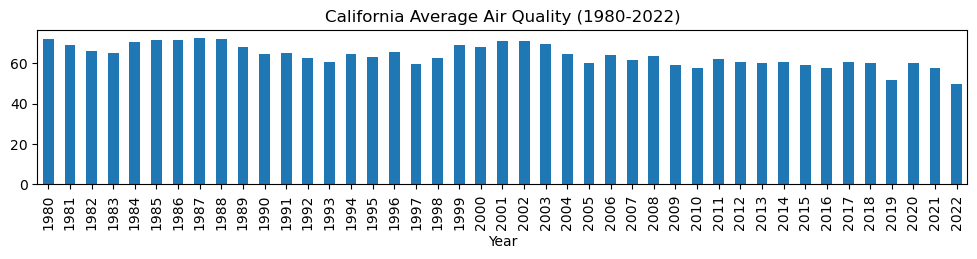

In [144]:
AVG_STATE_AQI('CA','California')
plt.savefig('CA.png')

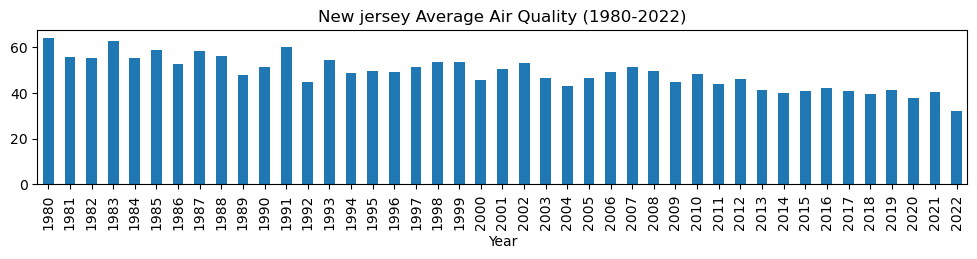

In [145]:
AVG_STATE_AQI('NJ','New jersey')

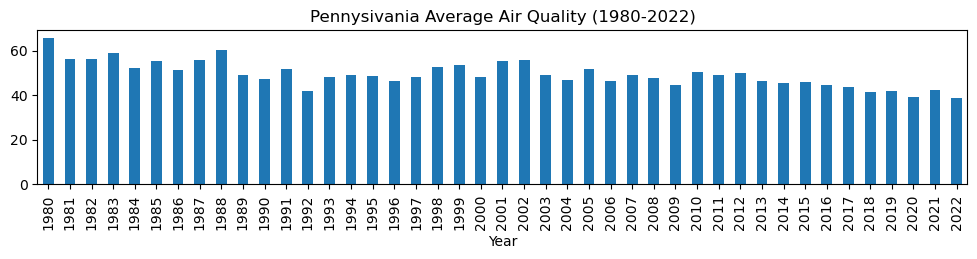

In [146]:
AVG_STATE_AQI('PA','Pennysivania')

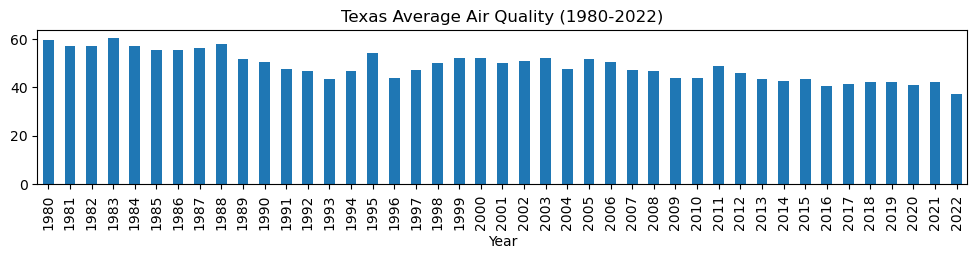

In [147]:
AVG_STATE_AQI('TX','Texas')

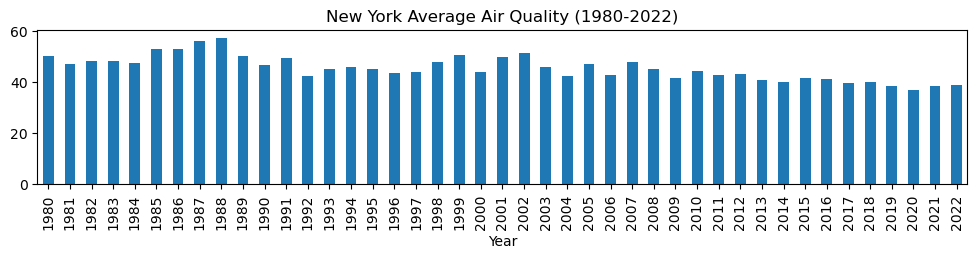

In [178]:
AVG_STATE_AQI('NY','New York')